**SENTIMENT ANALYSIS ON AMAZON ELECTRONIC PRODUCTS**

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree

C:\Users\andre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Specify the path to your CSV file
csv_file_path = "Amazon Reviews 1.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

C:\Users\andre\AppData\Local\Temp\ipykernel_18360\3612977657.py:5: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


In [4]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
print( f'Shape of the dataset: ', df.shape )

Shape of the dataset:  (34660, 21)


In [6]:
#Now, let's see what are the columns in our database:

print ( f'Number of features in our dataset: ', len( df.columns ) )
print( '\n' )

for column in df.columns:
    print( column )

Number of features in our dataset:  21


id
name
asins
brand
categories
keys
manufacturer
reviews.date
reviews.dateAdded
reviews.dateSeen
reviews.didPurchase
reviews.doRecommend
reviews.id
reviews.numHelpful
reviews.rating
reviews.sourceURLs
reviews.text
reviews.title
reviews.userCity
reviews.userProvince
reviews.username


!Here we are planning on describing each feature like in the Titanic lab, but we are waiting for the Kaggle link in case there is already a description which would make it easier!

In [7]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [8]:
amazon_categorical = []
amazon_numerical = []

for column in df.columns:
    if df[column].dtype == 'object':
        amazon_categorical.append(column )
    else:
        amazon_numerical.append(column )  
        
print( f'Number of categorical features: ', len(amazon_categorical) )
print ( '\n' )
        
print ( amazon_categorical )

Number of categorical features:  16


['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username']


In [9]:
print( f'Number of numerical features: ', len(amazon_numerical) )
print ( '\n' )

print ( amazon_numerical )

Number of numerical features:  5


['reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.userCity', 'reviews.userProvince']


Now, we want to look for features which contain $blank$ , $NULL$ or $empty$ values.

In [10]:
amazon_features_blank = []

for features in df.isnull():
    if df[features].isnull().sum() > 0:
        amazon_features_blank.append(features)
        print( features, '\n', df[features].isnull().sum() )
        
print( '\n' )        
print( f'Number of features that contain blank, null or empty values is: ', len(amazon_features_blank) )
print( '\n' )
print ( amazon_features_blank )

name 
 6760
asins 
 2
reviews.date 
 39
reviews.dateAdded 
 10621
reviews.didPurchase 
 34659
reviews.doRecommend 
 594
reviews.id 
 34659
reviews.numHelpful 
 529
reviews.rating 
 33
reviews.text 
 1
reviews.title 
 5
reviews.userCity 
 34660
reviews.userProvince 
 34660
reviews.username 
 2


Number of features that contain blank, null or empty values is:  14


['name', 'asins', 'reviews.date', 'reviews.dateAdded', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username']


Let's drop the completely(or almost) empty columns:

In [11]:
df = df.drop( columns = [ 'reviews.id', 'reviews.didPurchase', 'reviews.userCity', 'reviews.userProvince' ] )

In [12]:
#Here, we replace the null values in the reviews and they titles by empty string

df['reviews.text'].fillna('', inplace = True)
df['reviews.title'].fillna('', inplace = True)

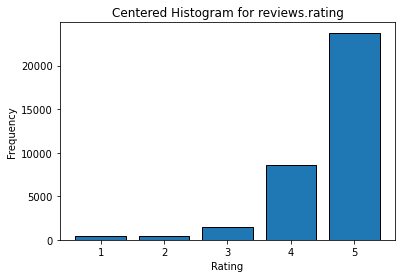

In [13]:
'''plt.hist( df['reviews.rating'])
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Histogram for reviews.rating' )
plt.show()'''
data = df['reviews.rating']

num_bins = 5  
bin_width = 1

bin_boundaries = np.arange(min(data) - bin_width/2, max(data) + bin_width/2 + 1, bin_width)
bin_centers = bin_boundaries[:-1] + bin_width / 2

plt.hist(data, bins=bin_boundaries, edgecolor='black', rwidth = 0.8)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Centered Histogram for reviews.rating')

plt.show()

In [14]:
product_counts = df[ 'asins' ].value_counts()

product_counts

B018Y229OU               10966
B00L9EPT8O,B01E6AO69U     6619
B00U3FPN4U                5056
B00OQVZDJM                3176
B01AHB9CN2                2814
B018Y23MNM                1685
B018Y225IA                1038
B01BH83OOM                 636
B00IOY8XWQ                 580
B01J2G4VBG                 402
B00TSUGXKE                 372
B018SZT3BK                 270
B0189XYY0Q                 256
B00ZV9PXP2                 212
B01AHB9CYG                 158
B00QFQRELG                  73
B00VINDBJK                  67
B00IOYAM4I                  51
B01BFIBRIE                  30
B00QJDU3KY                  19
B002Y27P3M                  19
B01J4ORNHU                  16
B00QL1ZN3G                  15
B01AHB9C1E                  14
B006GWO5WK                  13
B00LW9XOJM                  13
B002Y27P6Y                  10
B018Y22BI4                  10
B006GWO5NE                   8
B00UH4D8G2                   8
B00X4WHP5E                   7
B018T075DC                   7
B018Y22C

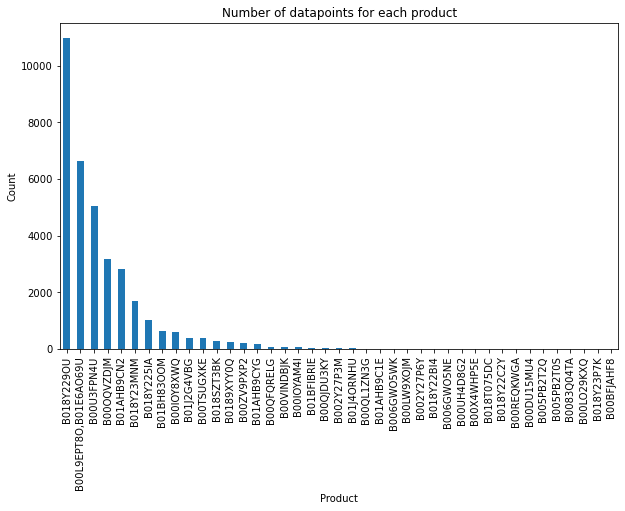

In [15]:
plt.figure( figsize = (10, 6) )
product_counts.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Number of datapoints for each product') 
plt.show()

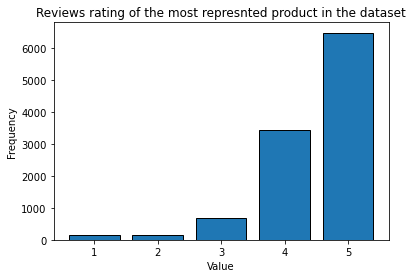

In [16]:
'''filtered_df = df[ df['asins'] == 'B018Y229OU' ]

plt.hist( filtered_df['reviews.rating'])
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Reviews rating of the most represnted product in the dataset' )
plt.show()'''
filtered_df = df[ df['asins'] == 'B018Y229OU' ]

num_bins = 5  
bin_width = 1

bin_boundaries = np.arange(min(filtered_df['reviews.rating']) - bin_width/2, max(filtered_df['reviews.rating']) + bin_width/2 + 1, bin_width)
bin_centers = bin_boundaries[:-1] + bin_width / 2

plt.hist( filtered_df['reviews.rating'], bins=bin_boundaries, edgecolor='black', rwidth = 0.8)
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Reviews rating of the most represnted product in the dataset' )

plt.show()

In [17]:
overall_grade = filtered_df['reviews.rating'].mean()
print( overall_grade )

4.454222141163597



**CLEANING THE DATASET: REMOVING PUNCTUATION FROM REVIEWS**


In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
translator = str.maketrans('', '', string.punctuation)

df['reviews.text'] = df['reviews.text'].apply(lambda x: str(x).translate(translator) if pd.notnull(x) else x )
    
print( df['reviews.text'][0])

This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with ease


In [20]:
translator = str.maketrans('', '', string.punctuation)

df['reviews.title'] = df['reviews.title'].apply(lambda x: str(x).translate(translator) if pd.notnull(x) else x )
    
print( df['reviews.title'][2])

Beginner tablet for our 9 year old son


In [21]:
df['length_review'] = df['reviews.text'].apply(len)

for i in df['length_review']:
    print(i)

141
74
125
584
606
206
110
129
260
54
51
83
139
61
51
77
59
159
61
307
109
160
81
219
166
90
84
163
49
96
48
92
63
143
60
100
61
70
53
57
403
72
68
121
55
111
128
65
51
132
123
102
410
54
106
88
67
423
54
57
230
86
83
73
111
98
76
143
86
49
85
82
65
67
86
212
79
168
57
63
88
104
387
474
74
310
84
327
403
935
87
55
773
47
53
143
55
300
130
125
146
75
75
242
46
74
66
52
57
64
82
484
160
121
291
228
144
97
76
70
46
168
82
72
95
176
1030
65
215
59
528
70
131
129
61
333
63
45
322
249
66
142
56
126
110
86
88
87
143
156
207
304
117
770
126
307
147
84
61
132
125
108
94
105
51
64
102
91
240
120
81
51
83
51
67
631
220
105
104
96
82
114
227
72
67
60
70
56
61
82
489
428
264
202
239
72
51
55
94
224
161
73
82
120
83
55
259
127
118
99
71
123
109
53
71
51
82
227
53
77
47
963
176
94
443
95
213
69
55
62
214
54
96
75
122
107
73
97
119
101
63
49
190
124
176
339
87
72
86
236
49
79
145
391
119
335
289
148
63
445
113
63
106
68
199
356
82
485
50
79
195
222
120
190
73
86
73
185
65
76
51
67
210
126
89
72
131
72

617
209
9
51
61
97
49
54
81
63
192
61
133
116
110
65
89
84
54
209
70
56
62
534
56
52
236
57
103
103
59
119
144
104
68
131
63
66
93
58
97
79
164
76
353
213
64
120
79
69
116
48
84
75
181
53
153
63
73
63
81
77
51
75
481
197
86
861
954
114
100
70
455
209
107
141
407
86
70
59
409
68
356
149
84
400
110
82
69
92
61
115
285
75
53
70
55
124
57
52
61
552
60
172
87
106
86
214
142
66
77
79
163
130
268
190
66
63
63
76
233
47
75
240
74
145
58
225
71
77
97
239
119
69
63
123
194
62
73
141
90
118
48
184
99
99
77
358
94
324
235
76
316
265
159
50
54
52
252
155
74
71
129
77
168
66
79
210
125
120
94
70
90
93
84
101
108
276
60
108
143
129
172
64
83
54
199
51
58
106
113
143
52
122
53
126
99
125
124
54
163
78
122
214
150
195
118
83
68
70
76
146
149
141
56
109
123
64
76
94
58
931
64
64
90
217
132
187
314
157
56
72
68
84
116
75
83
69
115
75
48
188
57
86
230
73
161
94
220
73
53
241
54
74
83
297
127
130
62
292
52
227
133
292
98
51
214
144
158
29
361
81
57
77
76
61
252
192
48
306
168
65
72
161
166
118
254
156
55
1

128
67
144
99
158
133
55
68
127
54
52
48
55
50
74
131
61
170
66
95
117
52
591
101
526
123
90
107
62
182
169
164
62
92
69
51
53
112
56
47
101
138
82
52
63
235
110
61
148
61
59
76
345
162
111
254
85
85
143
440
372
54
82
88
74
58
61
42
61
117
70
49
161
360
121
72
56
80
127
66
98
320
50
363
148
341
78
49
59
82
19
221
505
50
57
423
57
79
130
218
241
72
300
66
249
83
116
96
219
107
67
897
58
121
116
89
59
324
100
182
284
66
92
58
77
95
220
51
1041
89
131
259
104
146
84
52
71
60
71
54
192
58
77
190
63
110
64
61
71
66
78
85
257
57
154
108
202
74
165
94
273
135
73
59
113
138
138
260
63
99
100
128
265
850
117
152
293
151
102
69
222
246
50
59
123
252
335
95
197
309
258
111
418
135
85
170
97
65
48
109
55
162
51
92
127
184
239
244
125
175
921
131
56
292
130
86
81
257
76
48
154
54
62
101
93
93
135
174
116
60
117
532
342
80
98
48
60
59
234
221
114
301
238
67
112
198
173
80
121
62
62
62
60
113
204
65
62
103
46
103
89
94
104
100
139
137
111
61
108
52
204
197
95
100
83
81
121
83
49
68
49
89
103
437
48
5

68
133
134
137
396
134
54
67
202
103
53
107
132
112
182
254
132
49
120
109
209
106
74
146
93
75
153
95
76
94
144
432
61
72
66
417
196
504
232
136
84
199
74
63
107
432
224
52
48
93
255
64
174
87
94
53
74
65
639
71
66
225
49
50
149
183
126
182
51
73
128
57
157
171
50
406
80
72
92
128
65
49
63
82
75
77
131
232
59
143
54
48
80
102
60
83
109
57
63
208
96
100
151
70
70
64
74
94
66
259
77
62
58
74
118
123
109
79
85
69
48
69
64
56
140
71
68
70
160
85
51
95
79
192
44
163
101
69
68
59
80
150
139
120
79
131
84
395
79
58
107
46
113
57
67
75
418
89
90
117
93
77
108
346
60
81
160
229
291
54
150
110
132
94
116
134
65
76
87
49
275
77
52
80
1066
122
226
251
123
89
134
67
121
557
76
163
73
56
107
268
57
76
80
188
298
63
165
199
48
163
103
89
114
74
107
81
465
71
92
108
45
69
91
57
76
88
100
60
141
50
122
97
61
98
317
58
92
70
285
70
53
163
67
93
41
90
46
75
81
117
115
104
282
82
78
72
51
49
145
214
69
364
301
273
121
132
111
110
68
104
76
75
55
64
457
405
68
87
59
94
55
86
46
396
531
83
52
76
140
143
84

111
66
216
58
105
74
59
115
151
117
81
142
54
68
225
70
59
203
200
285
99
101
213
48
298
74
99
447
74
205
119
130
118
49
224
111
160
58
83
60
89
49
51
114
120
148
122
240
47
108
50
111
19
267
234
122
55
61
63
56
77
49
113
178
144
56
56
69
111
98
131
62
344
302
66
182
139
319
175
61
80
63
80
91
230
62
50
49
144
54
237
372
89
52
161
81
64
81
197
134
148
108
52
92
81
66
137
1366
78
103
127
70
72
77
71
82
113
168
121
175
90
159
76
111
422
173
215
59
147
338
92
85
100
259
315
40
72
179
140
236
128
428
89
71
202
342
54
215
96
400
79
54
326
75
358
304
661
96
45
498
85
82
78
136
56
79
49
152
49
163
123
134
73
81
108
165
74
66
129
84
130
178
119
217
110
87
55
165
240
49
118
151
103
51
63
76
112
73
146
52
56
58
115
405
53
111
179
54
51
141
74
71
98
305
231
68
368
54
91
184
276
111
295
69
110
68
145
91
66
47
60
98
95
71
57
297
64
94
59
128
86
62
118
148
76
224
73
218
215
56
146
148
76
124
73
308
99
78
153
59
48
48
88
114
206
124
82
91
59
102
82
53
194
60
59
73
192
142
52
92
70
383
226
99
56
166
2

63
130
82
76
140
51
133
65
138
121
333
106
77
92
84
75
87
67
113
58
49
108
187
64
61
70
268
159
52
87
283
49
333
258
544
84
155
60
67
311
100
244
85
205
60
498
356
62
78
197
79
56
119
103
581
78
228
1307
79
121
247
140
401
253
52
156
351
139
60
98
68
342
72
201
59
210
80
393
103
75
242
160
129
142
63
259
70
191
85
109
181
48
303
82
51
173
64
215
83
148
104
250
140
278
58
70
64
100
99
109
173
181
84
66
141
49
279
159
116
83
51
634
97
65
87
80
215
271
197
88
510
61
55
90
102
59
90
63
43
99
114
160
96
79
65
57
57
110
34
57
61
144
49
183
143
75
190
111
164
188
870
112
113
75
385
49
440
276
52
56
174
94
85
425
127
70
673
305
68
57
118
257
233
301
73
159
442
446
102
71
220
145
324
48
548
66
114
184
61
487
1234
380
106
322
468
358
461
184
136
54
72
160
205
276
94
250
111
50
55
78
85
223
105
62
145
426
47
79
120
89
91
356
186
49
129
168
117
54
62
74
100
69
52
51
162
76
215
89
53
57
189
107
110
124
47
72
65
249
109
69
59
796
341
140
52
110
524
59
196
60
1497
1284
268
487
29
70
651
413
229
241
6

115
147
118
82
52
152
109
336
67
69
80
57
145
92
198
49
192
64
138
85
65
131
71
63
73
93
55
162
65
68
229
108
116
89
59
108
208
61
115
379
72
110
221
77
49
55
48
163
208
225
107
960
159
56
73
71
385
119
62
81
59
125
121
99
96
246
479
47
191
116
173
72
90
80
183
85
63
49
112
66
247
51
67
90
165
97
72
160
67
170
58
495
117
166
48
412
102
141
101
210
119
128
274
139
192
69
69
100
148
79
119
120
73
149
47
197
77
75
588
280
86
74
53
49
53
91
155
54
98
79
176
111
111
173
82
70
48
247
195
99
115
82
469
79
58
92
67
52
51
202
126
76
84
105
52
188
51
100
187
189
298
60
210
89
86
216
123
200
107
165
112
190
82
71
99
96
277
66
55
59
97
60
132
183
618
63
64
60
179
62
112
62
63
94
127
79
534
183
136
81
133
72
83
128
69
67
60
61
259
122
360
553
121
106
293
66
1253
323
422
277
72
66
74
173
74
53
53
69
51
99
171
120
195
129
125
195
72
115
91
346
127
136
182
186
93
79
78
112
68
48
54
157
98
229
76
183
56
65
165
49
276
76
204
142
89
58
290
64
134
129
75
171
171
535
59
185
280
58
66
55
53
53
233
103
120
1

76
379
82
140
60
164
114
173
452
166
88
167
115
139
78
68
295
156
65
85
57
59
104
160
74
278
108
66
67
79
56
447
72
53
113
225
216
172
150
174
179
409
172
58
146
63
70
88
105
49
111
96
49
58
53
309
433
725
245
63
186
87
189
56
56
244
102
100
217
207
67
58
56
99
93
73
65
152
73
66
185
252
211
143
146
73
95
66
80
101
98
102
184
194
89
50
76
120
86
148
166
59
168
62
68
96
265
113
53
31
54
254
64
114
129
167
56
57
60
459
69
54
95
404
561
51
49
56
113
281
294
406
263
211
814
190
92
66
232
135
131
86
63
100
74
52
86
161
63
132
63
51
190
237
79
189
51
186
80
77
57
63
155
144
69
91
89
104
63
79
157
321
106
158
196
87
288
364
192
236
78
105
144
53
99
58
141
173
221
284
379
703
64
62
533
114
70
65
204
197
59
55
132
116
249
66
436
67
100
57
57
171
214
127
434
196
201
179
230
299
68
67
173
339
82
240
62
308
52
305
167
72
95
188
51
902
213
120
48
95
707
111
77
56
177
119
79
70
131
163
160
185
86
58
126
142
308
230
112
423
294
98
102
119
97
151
925
91
90
119
63
126
171
80
123
185
315
86
66
188
1465


86
132
222
614
54
87
159
146
266
48
57
129
75
84
214
151
57
73
157
237
139
110
264
391
194
64
116
63
259
82
59
58
118
147
181
108
104
105
211
199
90
86
54
52
161
50
108
51
83
55
63
85
131
202
77
114
65
406
78
52
276
143
170
99
56
118
55
111
193
68
219
111
83
371
161
126
130
216
91
288
672
230
355
68
71
136
109
59
69
184
120
78
138
84
115
372
56
96
147
121
54
78
108
171
88
203
85
210
544
103
155
121
393
91
237
144
302
131
403
325
105
126
126
78
184
131
213
148
334
186
228
67
255
83
69
424
230
72
54
107
354
156
123
51
53
229
155
52
291
142
54
305
224
71
123
187
91
52
136
65
162
63
104
252
699
276
75
223
282
489
159
69
156
108
112
61
133
172
154
225
132
276
117
57
64
264
1627
138
169
198
66
86
149
93
103
74
230
120
61
166
118
115
152
61
48
100
122
334
45
54
121
179
118
143
116
103
79
1179
165
157
395
100
368
52
141
59
66
347
51
85
109
112
79
53
106
53
1222
98
93
264
105
57
64
406
84
72
131
206
146
264
261
283
111
55
157
235
404
123
135
44
67
240
201
125
217
94
72
56
243
102
54
70
158
273


144
61
197
61
54
212
98
146
51
50
83
87
111
157
292
182
96
209
114
82
61
52
71
62
214
98
150
183
135
91
143
73
87
53
46
65
118
100
66
103
109
62
111
154
57
115
129
77
69
2195
148
51
77
56
87
64
148
376
339
227
389
176
186
66
61
55
80
50
171
117
107
54
122
61
143
86
2642
72
147
48
47
130
71
451
98
172
194
116
153
106
246
104
123
232
85
156
50
85
178
45
165
75
38
92
67
150
104
322
132
737
152
100
109
537
141
118
64
503
110
245
67
162
78
91
59
50
211
86
193
51
103
60
93
129
81
120
84
55
107
102
303
55
105
112
49
55
87
70
98
123
355
52
47
101
103
130
109
123
334
507
176
50
90
57
104
56
194
545
322
164
156
166
60
83
71
55
213
107
254
51
238
51
306
103
138
372
155
157
95
149
51
153
41
206
68
210
74
60
82
49
141
113
73
103
79
88
194
192
846
71
161
172
93
238
123
128
341
192
59
75
195
453
65
82
51
191
59
81
58
58
123
117
146
134
169
51
87
87
54
65
171
109
163
117
111
86
67
871
75
133
80
60
77
338
350
139
63
100
58
47
73
49
262
279
53
86
145
184
52
82
123
129
218
264
80
86
213
86
109
226
264
76

60
463
63
69
74
81
104
411
55
84
1186
59
297
115
78
167
77
333
56
93
249
263
100
120
119
50
111
172
63
63
393
55
74
162
116
53
260
80
215
262
55
150
202
60
307
131
47
90
197
116
187
355
278
288
346
150
107
88
60
661
66
153
182
123
91
61
49
147
131
68
629
66
61
91
92
80
79
320
74
85
52
989
151
84
170
98
147
171
98
66
104
162
105
484
65
344
128
60
90
55
46
58
293
349
121
51
175
365
289
157
54
138
111
186
314
51
68
97
515
177
281
61
275
123
112
79
54
97
77
52
171
1410
111
268
150
94
374
81
353
316
256
54
131
140
66
101
281
215
91
530
201
118
113
207
405
169
53
409
190
108
257
118
114
130
211
96
87
95
57
138
257
108
164
135
68
137
340
441
371
81
423
85
453
63
480
66
128
211
210
182
66
52
423
88
121
86
99
97
96
48
80
69
70
247
117
66
63
91
81
76
50
60
92
72
189
46
114
427
61
187
59
336
76
233
47
149
83
59
123
141
133
72
59
195
323
222
61
82
102
182
52
173
149
203
1673
143
89
65
220
111
183
52
52
68
154
390
1259
109
341
118
59
741
262
58
66
157
69
96
598
61
51
64
216
73
157
49
197
136
65
185

223
10
97
85
128
61
113
79
51
55
217
132
158
291
63
43
54
83
55
48
210
113
123
110
81
593
101
77
70
53
142
157
147
64
247
67
82
125
80
167
293
222
98
282
94
106
139
48
62
83
58
59
63
84
125
62
117
182
79
64
89
195
238
103
74
211
56
89
126
144
70
100
105
99
69
269
51
68
92
57
95
51
52
53
126
98
65
111
109
50
50
82
68
129
329
89
59
99
78
64
84
128
58
57
67
154
216
24
46
207
71
398
159
52
158
79
155
48
71
76
134
81
137
115
77
211
71
72
37
85
286
89
239
351
146
51
104
107
69
205
57
45
197
66
175
59
87
50
242
214
87
79
252
170
208
342
336
178
69
93
255
65
52
145
72
54
50
119
88
110
54
82
66
60
201
50
74
561
59
114
98
233
105
58
76
51
63
165
114
747
186
93
170
186
86
107
219
63
78
195
57
156
259
192
133
79
246
59
304
176
120
68
89
469
102
55
58
61
182
209
56
88
41
214
152
59
52
92
144
50
69
105
60
104
146
51
82
80
66
181
70
57
49
137
59
94
122
47
86
95
116
72
93
72
96
48
126
134
124
369
57
58
66
84
44
167
74
86
51
94
66
341
419
101
49
80
58
138
48
196
132
56
152
78
75
397
86
332
65
50
78
75


In [22]:
df['length_title'] = df['reviews.title'].apply(len)

for i in df['length_title']:
     print(i)

6
9
38
4
25
21
20
15
17
28
25
17
11
9
9
22
4
25
20
13
16
18
10
21
34
30
20
43
9
12
43
24
13
22
12
31
13
14
12
5
31
9
19
31
15
25
26
14
11
7
34
26
36
13
16
5
12
31
37
19
35
31
12
23
13
10
17
11
11
18
27
9
12
11
12
18
26
9
23
15
21
43
29
25
14
17
10
7
38
19
22
11
21
7
14
26
13
35
21
11
10
7
10
7
11
16
48
7
50
17
9
16
13
29
26
24
28
12
26
26
15
14
9
18
17
29
17
29
31
17
21
34
16
46
13
18
9
24
49
23
18
24
24
21
7
14
23
5
22
34
18
25
20
43
48
27
12
11
24
7
16
26
1
18
9
4
15
33
29
18
4
6
19
11
18
22
25
26
19
7
24
9
29
10
34
26
6
17
14
19
36
25
27
19
10
13
11
8
15
27
12
28
13
10
44
7
38
12
18
19
21
25
32
20
19
15
11
44
17
12
8
30
14
12
41
14
33
32
11
11
9
12
27
16
28
16
12
32
22
9
12
13
22
7
19
30
21
19
19
19
4
18
15
33
9
26
30
18
18
23
20
22
21
11
12
13
12
17
13
9
29
32
12
26
23
9
12
10
7
12
16
10
13
7
11
2
32
14
9
30
14
5
21
24
20
7
11
30
16
13
26
4
19
11
21
23
12
27
19
35
14
5
19
18
10
10
12
18
12
11
7
24
23
23
18
7
22
18
4
45
34
12
24
46
38
25
17
19
15
30
20
25
13
12
40
17
27
14
21
33
7
1

15
15
27
31
22
33
19
21
87
49
22
49
82
87
22
82
5
9
34
9
40
18
25
11
5
30
13
35
17
8
12
30
12
9
8
22
12
38
15
12
46
43
31
8
11
5
18
16
7
12
11
30
27
16
39
24
5
23
26
11
12
12
24
33
20
25
37
12
19
41
14
13
38
18
20
26
10
40
12
14
25
13
24
13
9
13
11
39
10
24
16
32
23
12
20
9
19
23
13
20
23
49
12
34
7
17
20
13
9
14
16
19
20
17
30
7
11
22
44
12
19
11
22
11
30
3
19
12
27
25
45
5
9
18
46
40
33
12
15
30
22
27
24
23
27
22
17
11
32
11
22
14
38
32
12
11
27
21
8
13
30
22
9
10
10
18
25
50
17
44
14
13
22
11
22
9
13
14
17
5
12
11
23
21
7
24
36
12
15
7
35
23
15
18
9
12
12
17
16
13
10
14
10
5
10
0
14
9
78
10
20
7
13
10
10
25
13
10
10
26
50
20
22
61
22
64
17
11
10
31
10
19
10
10
10
10
8
47
10
19
10
10
9
10
10
41
9
8
10
25
10
9
10
25
22
10
10
46
15
10
11
23
10
10
10
12
8
14
10
10
11
30
44
10
39
10
10
18
10
10
10
10
10
10
10
11
16
13
22
8
10
5
10
10
22
9
43
10
10
10
6
23
10
28
10
8
28
10
10
10
10
10
45
7
4
10
10
10
10
12
10
10
11
8
13
13
26
10
10
10
10
27
37
10
10
14
53
10
13
10
52
17
10
41
15
10
10
15


18
7
7
4
10
11
16
7
18
16
14
11
18
19
13
19
40
12
39
24
26
13
5
20
18
22
15
19
18
24
19
15
10
28
23
17
12
19
11
17
13
11
24
6
20
9
23
15
18
27
19
12
31
25
12
22
17
11
26
15
26
14
24
12
34
9
17
35
14
19
32
11
13
28
4
17
14
11
14
16
19
7
13
23
20
20
8
28
17
20
4
15
13
12
8
25
18
13
35
21
22
22
29
13
16
13
11
12
23
23
18
21
21
16
25
22
38
25
26
17
33
6
48
11
21
15
26
13
12
16
20
17
18
12
28
18
12
27
26
20
20
27
10
5
25
35
31
18
12
4
11
13
27
29
21
11
23
14
11
7
24
17
22
14
20
32
35
23
20
25
31
16
12
9
10
22
27
18
9
33
18
17
39
13
5
14
13
13
14
31
7
12
11
22
10
4
23
4
22
13
7
24
22
29
9
13
28
14
47
13
12
38
21
38
30
19
20
8
4
15
24
19
11
16
12
11
11
14
14
26
15
33
13
24
12
21
13
16
31
20
16
24
24
4
50
7
11
14
47
42
26
12
39
22
26
26
16
42
17
2
18
18
12
12
18
17
12
36
4
9
25
26
18
11
10
20
9
25
40
14
23
25
15
13
20
39
13
21
12
17
24
12
43
8
10
23
11
49
6
26
39
30
6
14
5
21
15
28
50
18
23
16
12
8
11
18
9
14
35
21
19
4
12
10
14
17
10
32
12
19
11
14
34
17
32
10
41
12
12
18
10
5
15
12
10
16
24


30
27
7
46
41
23
32
9
16
41
12
38
17
7
21
12
12
28
17
31
7
11
16
23
4
19
27
14
12
14
23
18
26
40
10
15
29
32
17
27
14
20
12
11
41
22
20
24
7
19
12
22
34
9
12
45
28
29
27
19
15
12
13
15
23
28
13
13
9
45
10
13
19
11
26
11
14
19
24
29
15
20
26
42
12
25
9
17
21
29
34
12
19
14
10
29
25
22
27
25
11
15
47
36
35
26
10
9
11
12
19
20
27
21
24
23
6
22
11
15
26
25
21
21
14
14
18
19
18
13
16
5
16
12
12
25
9
44
40
11
11
18
23
5
14
12
18
11
19
10
12
15
17
14
29
32
13
14
35
18
29
36
12
12
39
12
7
40
18
17
33
17
25
21
24
32
24
12
11
31
19
14
11
12
31
25
18
26
24
18
22
11
16
27
5
12
13
16
34
12
19
12
6
26
20
35
24
25
11
22
12
39
33
34
8
33
13
18
24
8
26
10
21
22
23
11
26
13
44
24
31
33
21
46
11
7
12
9
7
5
23
34
11
27
9
20
21
26
30
16
9
40
14
36
10
16
46
31
13
12
46
10
36
11
16
49
21
4
22
35
35
12
23
26
13
11
11
20
19
32
5
11
12
11
12
24
47
48
10
13
18
13
11
11
33
14
15
25
28
15
20
22
9
12
12
10
9
14
15
47
24
32
11
13
43
12
25
12
19
18
17
19
9
22
12
9
19
18
27
9
20
18
25
6
28
26
29
21
12
21
10
10
12
16
1

27
17
7
22
17
11
19
21
19
12
13
9
12
9
16
15
23
12
19
16
33
12
11
4
9
11
6
11
48
12
28
14
24
28
26
11
14
26
36
10
21
12
5
20
19
24
13
12
4
18
21
16
29
19
5
12
30
24
12
4
13
10
18
4
28
4
20
21
11
9
32
26
25
15
21
31
12
5
16
11
27
18
16
28
13
21
16
11
34
7
14
7
14
27
12
20
39
32
6
22
16
30
39
9
22
5
23
15
19
19
24
7
11
20
12
24
9
18
11
10
12
16
6
19
10
19
18
11
21
24
19
29
25
6
12
20
18
22
14
17
20
14
7
19
23
32
12
19
12
21
10
10
11
12
26
21
14
9
13
24
14
27
14
13
11
11
15
26
21
33
12
11
6
32
4
4
9
19
20
21
30
18
22
13
20
11
20
38
14
17
26
11
19
29
26
24
18
34
13
17
12
29
27
19
12
7
13
10
28
18
10
5
15
26
20
39
28
37
15
13
11
13
19
30
17
5
38
12
23
18
26
13
12
5
12
11
5
10
18
9
17
7
18
13
8
17
36
12
15
12
39
49
12
12
5
33
9
12
28
26
37
11
11
11
13
14
28
14
9
9
13
5
27
21
14
19
28
14
4
23
18
29
31
12
9
22
21
37
21
31
14
13
27
31
16
18
40
13
7
12
13
5
22
9
21
11
11
24
7
21
24
12
14
23
12
46
26
19
7
10
9
16
12
42
18
14
14
13
30
23
9
31
16
14
34
11
7
23
16
19
11
9
21
18
20
4
19
9
10
22
14
26

30
14
18
12
15
14
19
19
22
21
23
5
20
20
17
32
35
6
44
17
41
13
45
14
15
19
17
14
4
12
12
35
37
21
13
26
12
29
12
28
28
2
17
12
14
24
49
24
14
15
12
39
13
12
28
9
24
26
21
9
8
12
22
25
22
9
21
7
7
19
29
21
17
23
16
19
21
19
14
7
14
12
17
5
21
14
19
5
14
22
14
4
10
14
24
17
29
20
21
22
16
9
6
4
14
18
16
11
14
6
13
13
34
16
20
27
25
7
25
11
5
14
14
7
43
11
15
18
5
7
7
13
21
21
24
20
13
18
14
23
35
13
12
13
5
9
20
14
29
19
16
9
19
26
7
26
26
27
28
18
15
27
18
21
21
18
21
14
27
14
16
18
15
8
14
22
18
21
30
14
13
5
11
14
25
24
4
21
14
24
12
7
14
28
7
11
48
12
9
44
26
13
5
12
6
20
32
24
32
25
19
19
14
13
25
22
20
23
21
16
14
9
14
12
19
33
15
13
14
32
14
19
5
29
25
11
16
20
11
17
31
22
14
15
12
11
29
43
13
17
7
31
21
28
28
39
15
22
34
9
21
21
13
27
12
21
37
7
25
15
13
27
13
22
16
14
17
20
27
13
14
18
21
17
21
12
14
26
23
17
27
14
12
25
9
9
28
12
14
34
14
23
12
29
22
22
20
16
25
19
13
20
14
12
19
19
14
23
24
29
15
26
21
4
18
13
36
29
34
7
20
21
8
25
24
14
14
14
18
24
22
21
12
5
7
18
24
8
29
21

15
46
37
22
32
22
17
17
13
18
14
28
20
27
12
19
18
46
9
17
46
17
8
7
17
10
26
13
14
25
16
17
20
29
16
7
15
16
13
11
13
25
13
13
12
9
13
9
17
20
12
28
6
13
36
12
4
26
16
32
23
13
10
12
12
37
2
11
23
25
15
7
16
12
4
40
12
30
14
26
16
17
20
13
16
12
15
34
10
17
19
12
50
22
36
17
36
34
17
14
13
11
26
12
10
33
10
7
24
21
9
22
28
14
47
32
25
41
9
38
26
13
13
10
23
39
9
11
13
7
14
13
7
13
43
33
26
19
29
11
13
31
38
26
24
35
13
7
17
37
12
13
16
22
25
9
23
17
14
4
30
18
16
27
10
17
19
12
38
13
19
45
24
13
29
15
24
23
22
14
14
12
5
11
13
11
19
13
7
5
40
17
14
23
17
23
7
41
17
15
14
22
8
34
15
16
16
18
31
16
9
10
15
18
18
33
10
21
25
31
14
39
42
23
11
13
20
24
7
23
20
16
22
12
26
12
24
16
7
7
36
16
4
25
25
15
4
21
11
18
13
5
28
16
8
24
11
14
13
10
8
32
13
18
23
13
13
12
29
6
16
41
31
7
27
33
12
14
15
8
15
15
15
26
31
14
44
35
11
13
20
12
17
30
38
19
24
29
33
12
16
24
15
12
13
16
15
12
15
16
18
27
21
15
22
14
14
13
13
39
39
34
7
15
22
18
15
30
28
18
26
50
11
12
16
10
19
17
13
14
15
39
22
9
17
20
1

13
26
10
13
13
28
15
42
28
4
24
15
19
8
13
12
10
18
22
34
17
26
12
15
22
22
18
12
12
45
15
25
48
11
7
22
26
5
10
17
31
10
17
32
7
14
10
13
13
17
20
24
33
23
23
11
29
9
23
7
41
16
41
41
30
13
25
15
18
14
12
18
9
20
28
7
13
9
13
7
13
17
5
40
7
7
32
18
8
27
11
15
9
12
23
11
27
7
10
10
16
26
24
26
24
4
22
11
32
15
15
20
15
22
10
7
11
15
37
18
7
26
39
8
7
13
18
9
15
12
17
31
44
10
19
15
11
50
17
5
11
27
31
39
49
12
25
11
23
15
11
9
12
22
12
23
18
17
37
10
11
26
9
15
13
7
17
25
16
27
10
7
4
17
37
21
33
14
18
11
10
34
10
7
12
19
15
40
29
11
31
24
35
23
33
19
7
11
29
46
13
23
14
9
23
37
10
13
14
9
13
9
20
28
22
7
10
16
17
7
11
22
37
25
17
25
12
13
5
18
11
19
16
4
12
26
11
34
19
25
11
25
25
18
20
11
12
7
13
18
6
24
10
39
9
23
14
18
20
20
26
7
7
5
6
11
3
21
21
15
14
16
30
13
37
20
17
11
7
28
36
12
11
29
5
15
5
11
24
11
39
20
23
47
10
8
13
27
24
29
18
19
36
13
19
14
8
10
19
43
46
31
23
22
11
18
26
10
15
11
25
16
10
18
4
9
12
3
7
34
10
16
17
7
21
11
16
35
39
14
23
31
15
12
12
11
42
13
7
17
15
21
1

7
7
10
9
10
17
9
13
25
39
13
12
12
14
26
15
16
19
18
23
18
46
13
13
15
14
12
34
5
48
13
17
10
10
16
11
34
12
20
11
31
11
25
26
11
7
17
23
14
10
13
10
48
5
12
9
4
42
26
13
25
20
19
43
37
3
19
11
15
8
32
21
15
23
48
11
11
4
12
13
33
22
28
18
7
43
7
13
5
28
17
25
27
14
32
7
7
36
15
14
13
10
14
18
30
23
30
15
7
49
29
14
11
9
22
45
16
32
45
9
14
15
13
33
16
44
29
25
25
36
13
12
17
17
23
20
29
10
15
7
41
17
12
8
22
22
11
30
19
7
39
30
28
12
29
11
21
9
20
14
10
8
21
14
15
14
46
10
25
8
30
36
7
50
18
20
7
45
7
11
11
37
12
7
22
14
6
7
7
10
18
24
13
33
49
45
47
9
31
33
13
7
18
11
12
18
18
31
30
30
30
17
14
25
19
11
48
21
47
30
3
10
15
13
23
21
22
5
37
25
27
7
7
18
33
10
13
12
10
21
12
26
30
23
43
19
15
16
41
8
11
43
19
18
9
4
9
9
9
8
15
24
39
38
28
4
11
14
10
21
14
17
11
26
15
20
19
6
27
2
11
17
45
34
13
24
39
10
18
16
18
48
17
12
9
12
17
23
17
29
26
8
42
37
18
31
28
9
22
21
20
34
15
4
12
13
11
23
38
15
7
17
10
29
11
26
40
28
13
49
7
7
15
14
19
21
21
17
16
10
30
37
12
12
19
29
7
28
16
9
12
25
21

11
11
11
32
42
24
16
22
11
26
13
16
46
21
12
25
35
19
11
5
8
7
40
23
11
15
9
12
21
25
7
14
9
14
17
16
18
48
9
30
10
21
4
7
7
16
11
13
18
7
26
9
9
10
31
13
24
15
6
2
5
47
45
9
11
11
13
10
15
42
17
15
38
7
9
30
11
25
5
14
50
10
13
19
49
5
29
20
14
10
28
13
13
22
19
22
7
16
7
5
11
16
13
7
34
24
5
23
12
16
12
49
43
26
22
13
7
25
15
11
22
35
10
12
20
13
23
16
38
7
14
13
7
13
14
26
25
13
12
36
24
41
22
13
45
5
32
29
22
32
39
33
31
7
17
12
12
21
10
7
16
22
13
9
11
13
40
14
9
20
31
19
20
7
11
11
7
13
7
14
31
18
12
9
25
32
21
16
45
22
39
6
8
14
20
28
19
7
8
11
32
16
14
12
14
37
7
33
13
13
11
13
18
7
26
17
42
16
36
25
15
24
35
15
7
19
14
7
20
25
33
16
11
28
42
25
7
11
13
23
5
12
9
7
41
22
19
13
7
15
25
37
29
8
4
13
4
17
11
18
22
26
26
28
14
12
7
26
19
14
9
12
22
40
14
18
7
41
17
13
14
26
18
12
50
26
13
7
40
13
26
13
13
26
43
4
19
16
15
27
25
12
7
8
50
28
9
16
31
4
20
13
22
20
7
9
11
29
41
13
16
23
10
20
8
28
15
22
29
12
12
5
9
6
22
15
7
15
15
14
25
21
28
28
12
26
38
23
10
12
9
29
22
20
7
11
29
5

38
32
13
4
23
11
9
37
12
12
9
12
14
11
10
26
16
24
25
18
14
15
28
21
13
21
9
7
20
18
9
36
5
30
24
13
19
8
6
28
22
18
13
13
24
27
30
21
41
20
12
14
12
32
22
14
13
16
9
11
17
30
13
31
5
21
20
11
28
22
28
34
13
12
40
13
23
14
11
2
39
22
39
12
15
7
4
15
20
13
14
12
13
26
12
5
18
19
15
7
16
20
20
14
14
5
9
8
47
18
11
14
10
7
23
30
7
13
26
14
5
13
26
4
12
29
13
50
22
22
11
14
8
13
18
29
12
9
32
27
7
31
20
22
14
31
17
5
21
4
17
33
36
4
32
42
5
14
32
35
23
5
32
7
27
20
15
20
16
35
12
33
22
11
31
15
19
9
44
3
18
20
10
10
31
15
12
16
38
7
48
23
21
9
7
12
16
16
15
11
5
14
26
49
40
13
25
26
7
31
4
32
17
38
19
34
24
17
11
18
12
16
8
17
24
7
7
21
48
33
30
31
22
13
24
34
16
13
7
35
28
16
38
27
13
25
45
22
25
28
35
4
38
7
22
9
7
17
15
11
22
28
22
26
28
29
16
13
46
12
13
15
22
10
11
7
36
19
14
29
21
9
15
19
19
10
17
17
12
12
7
2
8
26
9
14
8
24
16
14
21
34
17
12
7
40
17
35
40
11
22
12
15
25
23
23
23
13
17
22
13
21
18
32
34
10
27
17
22
17
18
16
6
17
37
12
9
21
35
4
24
22
15
24
11
30
29
25
4
13
16
10
20
1

In [23]:
mean_length_review = df['length_review'].mean()
print( f'The mean length of reviews is: ', mean_length_review)
print('\n')
mean_length_title = df['length_title'].mean()
print( f'The mean length for titles is: ', mean_length_title)

The mean length of reviews is:  154.63537218695902


The mean length for titles is:  18.702769763416043


In [24]:
max_length_review = df['length_review'].max()
print( f'The max length of reviews is: ', max_length_review )
print( '\n' )
max_length_title = df['length_title'].max()
print( f'The max length of titles is: ', max_length_title )

The max length of reviews is:  10193


The max length of titles is:  191


In [31]:
def random_select(df, n, r, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column].isin(r)]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff


df_l = random_select(df, 500, np.arange(75, 201), 'length_review')
df_l.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,495.000000,500.000000,500.000000,500.000000
mean,0.139394,4.618000,123.082000,19.946000
std,0.681422,0.678968,35.476647,10.692977
min,0.000000,1.000000,75.000000,3.000000
25%,0.000000,4.000000,90.000000,12.000000
50%,0.000000,5.000000,118.000000,18.000000
75%,0.000000,5.000000,149.250000,25.000000
max,12.000000,5.000000,200.000000,83.000000


(0.0, 750.0)

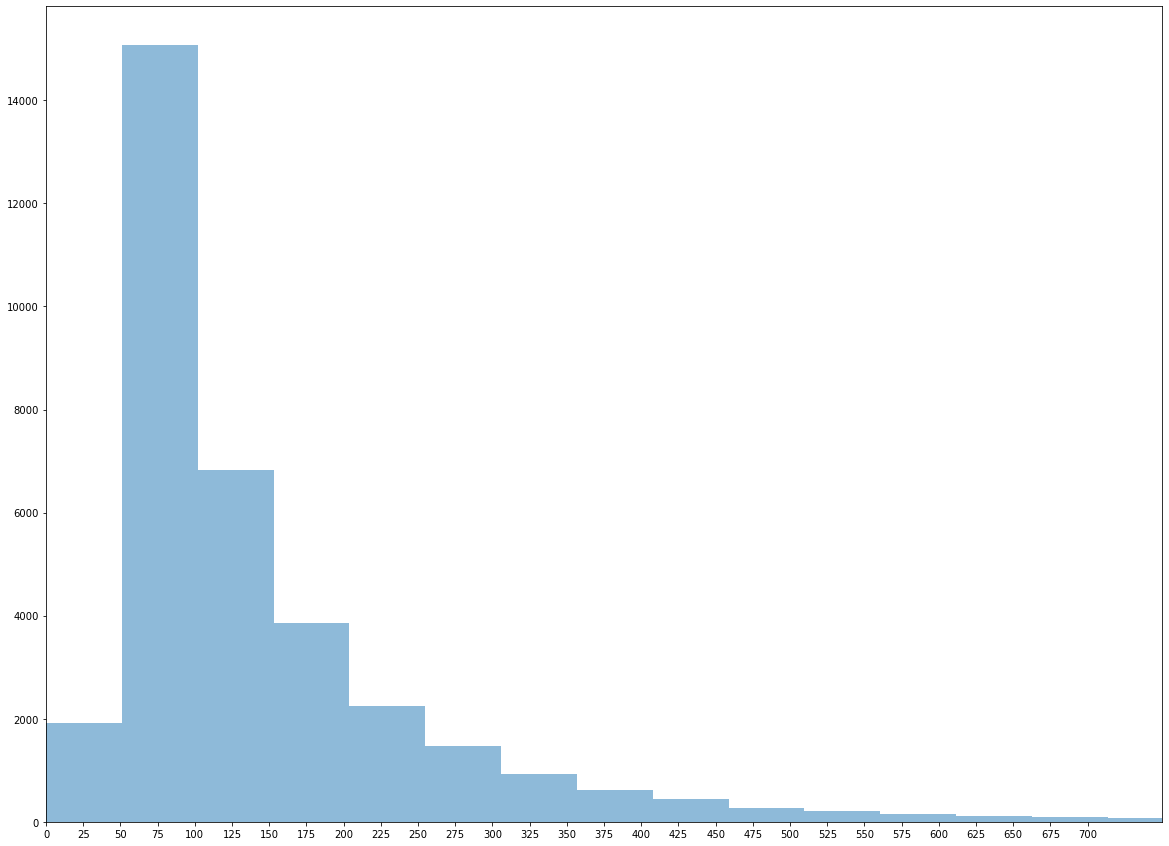

In [32]:
#bins = np.arange(0, 2000, 100 )
plt.figure(figsize = (20, 15))
ax1 = df.loc[df['reviews.rating'].isin([1, 2, 3, 4 ,5]), "length_review"].hist(bins=200, alpha = 0.5, label='Rating=1', grid = False) 
plt.xticks(np.arange(0, 701, step = 25))
#plt.yticks(np.arange(0, 5000, step = 100))
plt.xlim(0, 750)

In [ ]:
ax2 = df.loc[df['reviews.rating'] == 2, "length_review"].hist(bins=bins, figsize=(10, 5), alpha = 0.5 ) 

In [ ]:
ax3 = df.loc[df['reviews.rating'] == 3, "length_review"].hist(bins=bins, figsize=(10, 5), alpha = 0.5 )

In [ ]:
ax4 = df.loc[df['reviews.rating'] == 4, "length_review"].hist(bins=bins, figsize=(10, 5), alpha = 0.5 ) 

In [ ]:
ax = df.loc[df['reviews.rating'] == 5, "length_review"].hist(bins=bins, figsize=(10, 5), alpha = 0.5 ) 

In [ ]:
count = (df['length_review'] > 2000).sum()
count

In [ ]:
df = df.drop( columns = [ 'id', 'name', 'keys', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs' ] )

In [ ]:
df = df.drop( columns = [ 'reviews.dateAdded', 'reviews.username' ] )
df

In [ ]:
df_filtered = df[df['reviews.rating'].notna()]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist2d(df_filtered['length_review'], df_filtered['reviews.rating'], bins=20)
axs[0].set_title('Review Length vs Ratings')
axs[0].set_xlabel('Review Length')
axs[0].set_ylabel('Ratings')